## Yahoo Finance Analysis

Experiments with plotly and cufflinks

In [72]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import seaborn as sns


import plotly
import cufflinks as cf
cf.go_offline()

## When and What

Stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Data from Jan 1st 2006 to Jan 1st 2016

http://pandas.pydata.org/pandas-docs/stable/remote_data.html


In [52]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [53]:
# Bank of America
BAC = pdr.get_data_yahoo("BAC", start, end)

# CitiGroup
C = pdr.get_data_yahoo("C", start, end)

# Goldman Sachs
GS = pdr.get_data_yahoo("GS", start, end)

# JPMorgan Chase
JPM = pdr.get_data_yahoo("JPM", start, end)

# Morgan Stanley
MS = pdr.get_data_yahoo("MS", start, end)

# Wells Fargo
WFC = pdr.get_data_yahoo("WFC", start, end)

In [54]:
# list of tickers

tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [55]:
# concatenate dfs

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [56]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  38.591286  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  38.617764  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  38.723652  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  38.763355  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  39.173679  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

# EDA

[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) <br>
[Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html)

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [57]:
returns = pd.DataFrame()

In [58]:
# the formula above is implemented in pandas method pct.change

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Pairplot of returns

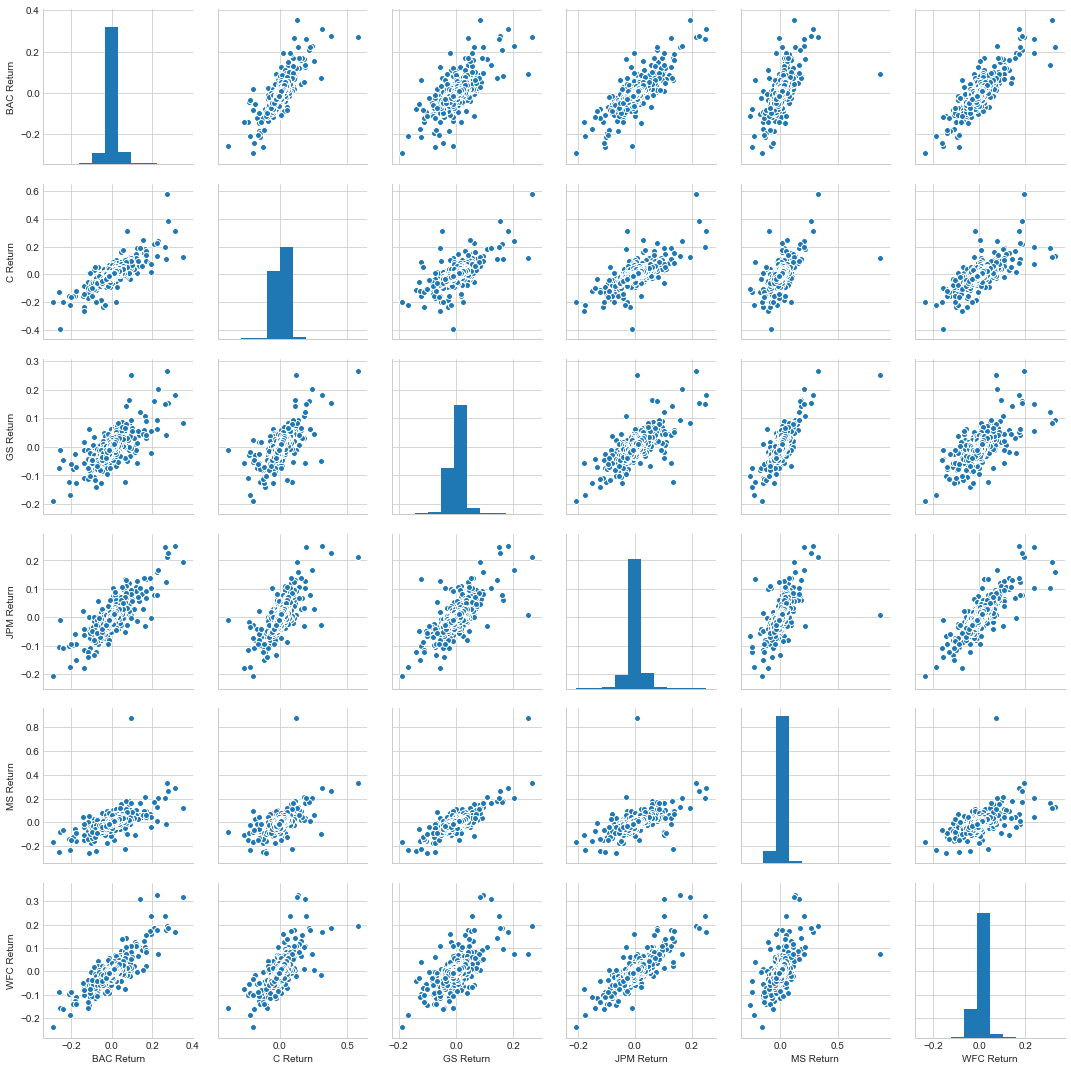

In [73]:
#returns[1:], since the first is NaN

sns.pairplot(returns[1:])

### Worst and Best Days

In [60]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

https://www.onthisday.com/date/2009/january/20

In [61]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

https://www.citigroup.com/citi/news/2011/110321a.htm

By looking at the std it is possible to define the riskiest comapny to invest in

In [62]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [65]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

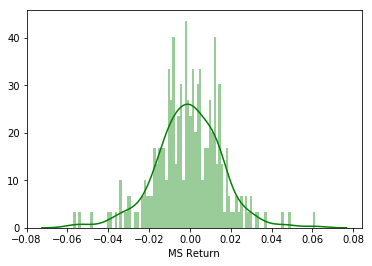

In [67]:
# distplot for 2015 returns of MS

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

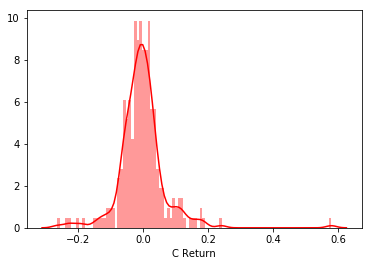

In [68]:
# distpolt for 2008 returns fo CitiGroup

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


# More Visualizations


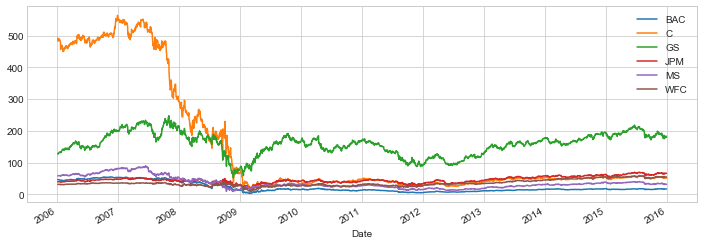

In [74]:
# Closing prices for each bank for entire time frame

# also bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [75]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

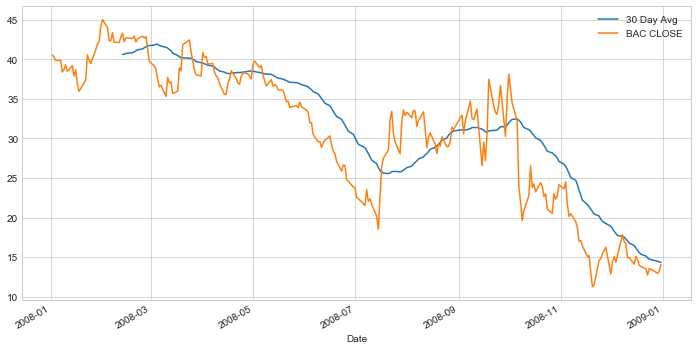

In [79]:
# Plot of the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

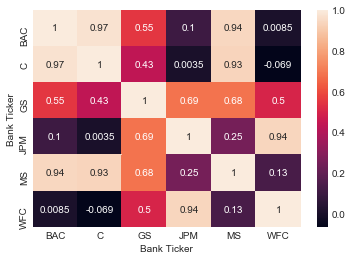

In [86]:
# heatmap of stocks' CLose Price correlation

sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

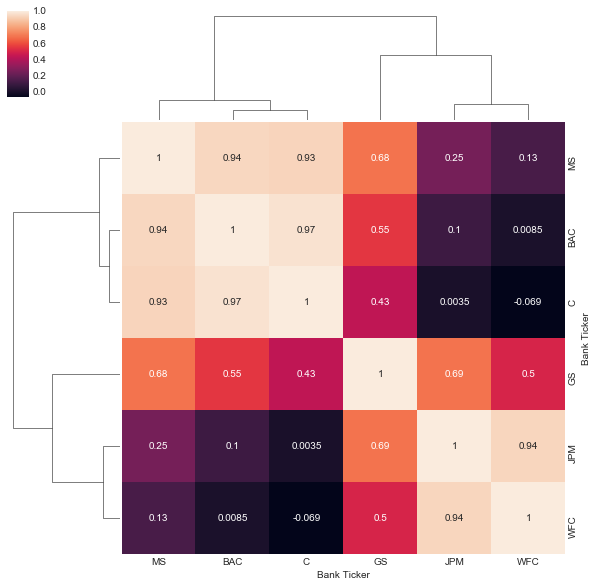

In [87]:
# same as above, but seaborn clustermap

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [88]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [91]:
# candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016

BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [93]:
# Simple Moving Averages plot of Morgan Stanley for the year 2015

MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [94]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')